## 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

plt.rc('font', family = "Malgun Gothic", size = 13)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('기상 데이터_홍로_일단위.xlsx', sheet_name = '전체')
df

,지역,연도,과중(g),종경(mm),횡경(mm),L/D 비율,경도1(N/ø11mm),경도2(N/ø11mm),경도평균,당도(˚Brix),산도(%),착색(Hunter L),착색(Hunter a),착색(Hunter b),Latitude,Longitude,광역자치단체
0,김제,2015,297.80,90.50,86.70,1.040000,36.0000,36.3000,36.20000,14.60,0.190000,55.2000,24.1000,24.90000,35.803608,126.880887,전라북도
1,김제,2016,270.40,83.10,87.40,0.950000,38.7000,38.4000,38.50000,15.30,0.190000,65.6000,21.0000,26.30000,35.803608,126.880887,전라북도
2,군위,2016,324.80,84.46,92.64,0.911701,40.8384,39.2750,40.05670,16.12,0.227353,65.4410,9.1670,30.54000,36.242835,128.572770,경상북도
3,군위,2016,292.00,81.62,89.04,0.916667,36.0948,38.8324,37.46360,16.08,0.194300,63.1970,13.3550,29.61500,36.242835,128.572770,경상북도
4,군위,2016,300.40,83.82,87.48,0.958162,41.9130,40.8992,41.40610,17.10,0.184473,63.8790,10.4040,29.58300,36.242835,128.572770,경상북도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,화성,2022,361.05,93.28,95.01,0.981791,35.8674,39.1803,37.52385,12.55,0.260046,56.8435,8.6235,21.30845,37.199493,126.831189,경기도
106,완주,2022,246.95,77.41,81.95,0.944600,40.5872,36.8956,38.74140,13.39,0.262278,56.7070,10.8375,21.41050,35.891275,127.253895,전라북도
107,완주,2022,234.37,75.62,80.59,0.938330,40.1038,38.5360,39.31990,13.23,0.246774,54.9595,14.5505,19.75600,35.891275,127.253895,전라북도
108,완주,2022,295.45,80.92,87.13,0.928727,33.8399,37.3311,35.58550,13.50,0.264610,63.0900,4.6535,22.73700,35.891275,127.253895,전라북도


## 포천, 춘천

In [4]:
df_pc = df[(df['지역'] == '포천') | (df['지역'] == '춘천')] 
df_pc.columns

Index(['지역', '연도', '과중(g)', '종경(mm)', '횡경(mm)', 'L/D 비율', '경도1(N/ø11mm)',
       '경도2(N/ø11mm)', '경도평균', '당도(˚Brix)', '산도(%)', '착색(Hunter L)',
       '착색(Hunter a)', '착색(Hunter b)', 'Latitude', 'Longitude', '광역자치단체'],
      dtype='object')

In [5]:
df_pc = df_pc[['지역', '광역자치단체', '연도', 'L/D 비율', '당도(˚Brix)', '산도(%)', '착색(Hunter a)']]
df_pc

,지역,광역자치단체,연도,L/D 비율,당도(˚Brix),산도(%),착색(Hunter a)
8,춘천,강원도,2016,0.874461,15.800000,0.159907,24.975000
9,춘천,강원도,2016,0.917968,15.420000,0.175540,29.370000
10,춘천,강원도,2016,0.952263,15.560000,0.189833,27.226000
17,포천,경기도,2016,0.890901,14.580000,0.238073,33.659000
18,포천,경기도,2016,0.879838,14.420000,0.212613,29.016000
25,포천,경기도,2017,0.924310,12.966667,0.226406,24.666667
26,포천,경기도,2017,0.905650,13.610000,0.209281,30.719000
27,포천,경기도,2017,0.902334,13.050000,0.197489,28.080500
32,춘천,강원도,2017,0.890230,12.680000,0.169322,35.237000
33,춘천,강원도,2017,0.887056,12.540000,0.190387,36.330000


In [6]:
df_pc = df_pc.replace(['포천', '춘천'], '포천_춘천')
df_pc

,지역,광역자치단체,연도,L/D 비율,당도(˚Brix),산도(%),착색(Hunter a)
8,포천_춘천,강원도,2016,0.874461,15.800000,0.159907,24.975000
9,포천_춘천,강원도,2016,0.917968,15.420000,0.175540,29.370000
10,포천_춘천,강원도,2016,0.952263,15.560000,0.189833,27.226000
17,포천_춘천,경기도,2016,0.890901,14.580000,0.238073,33.659000
18,포천_춘천,경기도,2016,0.879838,14.420000,0.212613,29.016000
25,포천_춘천,경기도,2017,0.924310,12.966667,0.226406,24.666667
26,포천_춘천,경기도,2017,0.905650,13.610000,0.209281,30.719000
27,포천_춘천,경기도,2017,0.902334,13.050000,0.197489,28.080500
32,포천_춘천,강원도,2017,0.890230,12.680000,0.169322,35.237000
33,포천_춘천,강원도,2017,0.887056,12.540000,0.190387,36.330000


## 화성

In [7]:
df_h = df[(df['지역'] == '화성') ]
df_h

,지역,연도,과중(g),종경(mm),횡경(mm),L/D 비율,경도1(N/ø11mm),경도2(N/ø11mm),경도평균,당도(˚Brix),산도(%),착색(Hunter L),착색(Hunter a),착색(Hunter b),Latitude,Longitude,광역자치단체
14,화성,2016,365.400,89.74,93.82,0.956512,39.888200,40.7944,40.34130,16.420,0.222887,57.26600,20.7710,26.01400,37.199493,126.831189,경기도
15,화성,2016,256.500,76.40,84.10,0.908442,42.245400,43.4784,42.86190,14.720,0.211720,57.69700,22.4810,28.08700,37.199493,126.831189,경기도
16,화성,2016,347.000,86.72,91.36,0.949212,36.712200,37.8886,37.30040,17.060,0.177327,53.48400,22.3350,26.05400,37.199493,126.831189,경기도
28,화성,2017,323.300,86.61,92.56,0.935717,36.403000,39.0612,37.80530,13.630,0.180471,59.45850,21.1265,27.31050,37.199493,126.831189,경기도
29,화성,2017,327.000,86.23,91.90,0.938303,35.893300,34.5208,35.20705,13.510,0.197194,58.79050,21.2180,27.28000,37.199493,126.831189,경기도
30,화성,2017,308.800,83.55,90.53,0.922898,38.768000,38.8623,38.83320,13.250,0.211398,57.15350,22.2770,26.41950,37.199493,126.831189,경기도
45,화성,2018,291.150,80.89,91.60,0.883079,36.325500,38.8191,37.57230,14.950,0.284281,60.57300,17.9945,29.82850,37.199493,126.831189,경기도
46,화성,2018,326.600,83.89,93.07,0.901365,36.707600,38.7898,37.74870,14.590,0.278975,58.11325,21.1320,29.38250,37.199493,126.831189,경기도
47,화성,2018,291.450,82.70,90.89,0.909891,35.758444,34.1662,34.84695,14.660,0.257883,63.85950,14.8280,31.26700,37.199493,126.831189,경기도
64,화성,2019,402.800,85.80,93.40,0.920000,37.700000,38.4000,38.10000,14.100,0.290000,52.20000,19.2000,19.40000,37.199493,126.831189,경기도


In [8]:
df_h = df_h[['지역', '광역자치단체', '연도', 'L/D 비율', '당도(˚Brix)', '산도(%)', '착색(Hunter a)']]
df_h

,지역,광역자치단체,연도,L/D 비율,당도(˚Brix),산도(%),착색(Hunter a)
14,화성,경기도,2016,0.956512,16.420,0.222887,20.7710
15,화성,경기도,2016,0.908442,14.720,0.211720,22.4810
16,화성,경기도,2016,0.949212,17.060,0.177327,22.3350
28,화성,경기도,2017,0.935717,13.630,0.180471,21.1265
29,화성,경기도,2017,0.938303,13.510,0.197194,21.2180
30,화성,경기도,2017,0.922898,13.250,0.211398,22.2770
45,화성,경기도,2018,0.883079,14.950,0.284281,17.9945
46,화성,경기도,2018,0.901365,14.590,0.278975,21.1320
47,화성,경기도,2018,0.909891,14.660,0.257883,14.8280
64,화성,경기도,2019,0.920000,14.100,0.290000,19.2000


## 영주, 충주

In [9]:
df_yc = df[(df['지역'] == '영주') | (df['지역'] == '충주')]
df_yc = df_yc[['지역', '광역자치단체', '연도', 'L/D 비율', '당도(˚Brix)', '산도(%)', '착색(Hunter a)']]
df_yc = df_yc.replace(['영주', '충주'], '영주_충주')
df_yc

,지역,광역자치단체,연도,L/D 비율,당도(˚Brix),산도(%),착색(Hunter a)
11,영주_충주,충청북도,2016,0.978422,14.860,0.215293,11.7260
12,영주_충주,충청북도,2016,0.959439,14.720,0.226907,15.2200
13,영주_충주,충청북도,2016,1.001623,14.360,0.247007,10.7100
22,영주_충주,충청북도,2017,0.951937,13.140,0.203144,27.8255
23,영주_충주,충청북도,2017,0.883037,13.300,0.181972,30.2340
24,영주_충주,충청북도,2017,0.931521,14.450,0.189476,31.3180
38,영주_충주,경상북도,2018,0.960000,13.300,0.210000,15.6000
39,영주_충주,충청북도,2018,0.922140,14.800,0.253903,17.6335
40,영주_충주,충청북도,2018,0.926436,15.810,0.254278,20.7715
41,영주_충주,충청북도,2018,0.941777,14.779,0.188511,21.4395


## 김제, 완주

In [10]:
# df_kw = df[(df['지역'] == '김제') | (df['지역'] == '완주') | (df['지역'] == '완주2')]
# df_kw = df_kw[['지역', '광역자치단체', '연도', 'L/D 비율', '당도(˚Brix)', '산도(%)', '착색(Hunter a)']]
# df_kw = df_kw.replace(['김제', '완주', '완주2'], '김제_완주')
# df_kw

In [11]:
df2 = pd.concat([df_pc, df_h, df_yc], ignore_index = True)
df2

,지역,광역자치단체,연도,L/D 비율,당도(˚Brix),산도(%),착색(Hunter a)
0,포천_춘천,강원도,2016,0.874461,15.80,0.159907,24.975
1,포천_춘천,강원도,2016,0.917968,15.42,0.175540,29.370
2,포천_춘천,강원도,2016,0.952263,15.56,0.189833,27.226
3,포천_춘천,경기도,2016,0.890901,14.58,0.238073,33.659
4,포천_춘천,경기도,2016,0.879838,14.42,0.212613,29.016
...,...,...,...,...,...,...,...
58,영주_충주,경상북도,2019,0.940000,13.80,0.250000,23.700
59,영주_충주,경상북도,2020,0.910000,13.50,0.300000,10.800
60,영주_충주,충청북도,2020,0.950000,13.30,0.290000,8.900
61,영주_충주,경상북도,2021,0.980000,12.20,0.240000,20.800


In [12]:
df2.columns = ['지역', '광역자치단체', '연도', 'LD 비율', '당도', '산도', '착색(Hunter a)']
df2

,지역,광역자치단체,연도,LD 비율,당도,산도,착색(Hunter a)
0,포천_춘천,강원도,2016,0.874461,15.80,0.159907,24.975
1,포천_춘천,강원도,2016,0.917968,15.42,0.175540,29.370
2,포천_춘천,강원도,2016,0.952263,15.56,0.189833,27.226
3,포천_춘천,경기도,2016,0.890901,14.58,0.238073,33.659
4,포천_춘천,경기도,2016,0.879838,14.42,0.212613,29.016
...,...,...,...,...,...,...,...
58,영주_충주,경상북도,2019,0.940000,13.80,0.250000,23.700
59,영주_충주,경상북도,2020,0.910000,13.50,0.300000,10.800
60,영주_충주,충청북도,2020,0.950000,13.30,0.290000,8.900
61,영주_충주,경상북도,2021,0.980000,12.20,0.240000,20.800


In [13]:
data = df2.loc[:, 'LD 비율':]
data

,LD 비율,당도,산도,착색(Hunter a)
0,0.874461,15.80,0.159907,24.975
1,0.917968,15.42,0.175540,29.370
2,0.952263,15.56,0.189833,27.226
3,0.890901,14.58,0.238073,33.659
4,0.879838,14.42,0.212613,29.016
...,...,...,...,...
58,0.940000,13.80,0.250000,23.700
59,0.910000,13.50,0.300000,10.800
60,0.950000,13.30,0.290000,8.900
61,0.980000,12.20,0.240000,20.800


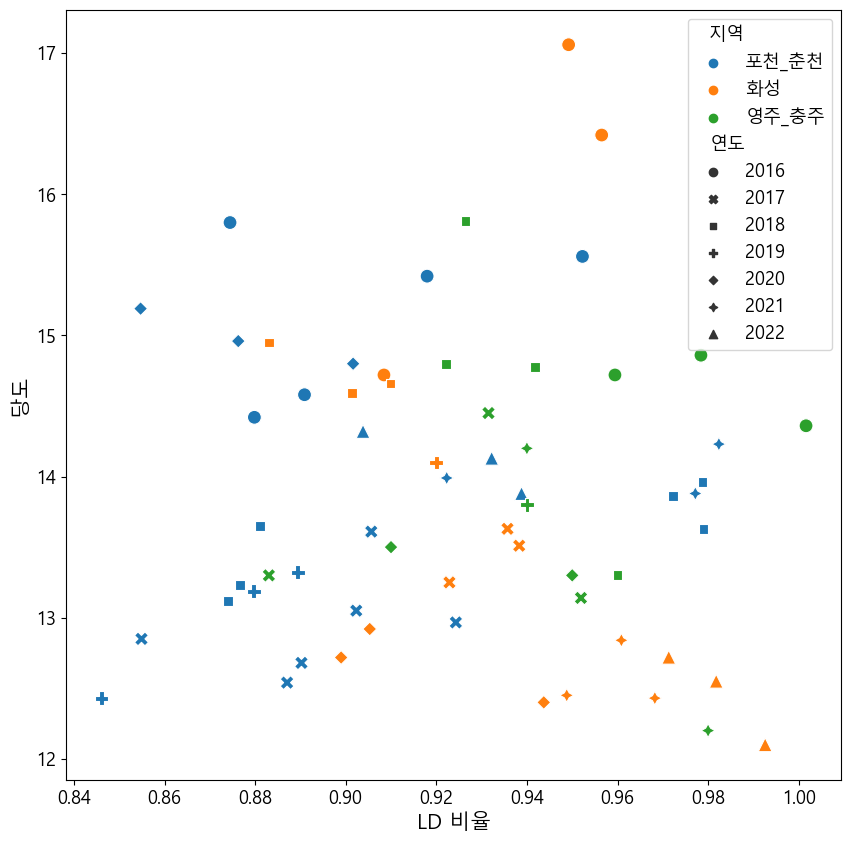

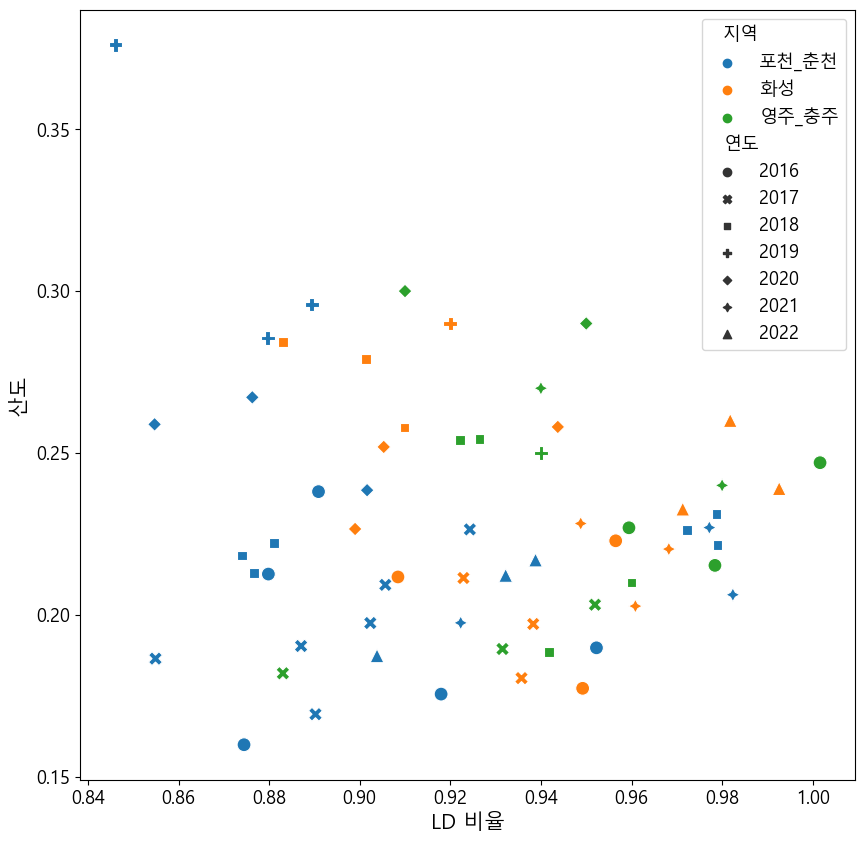

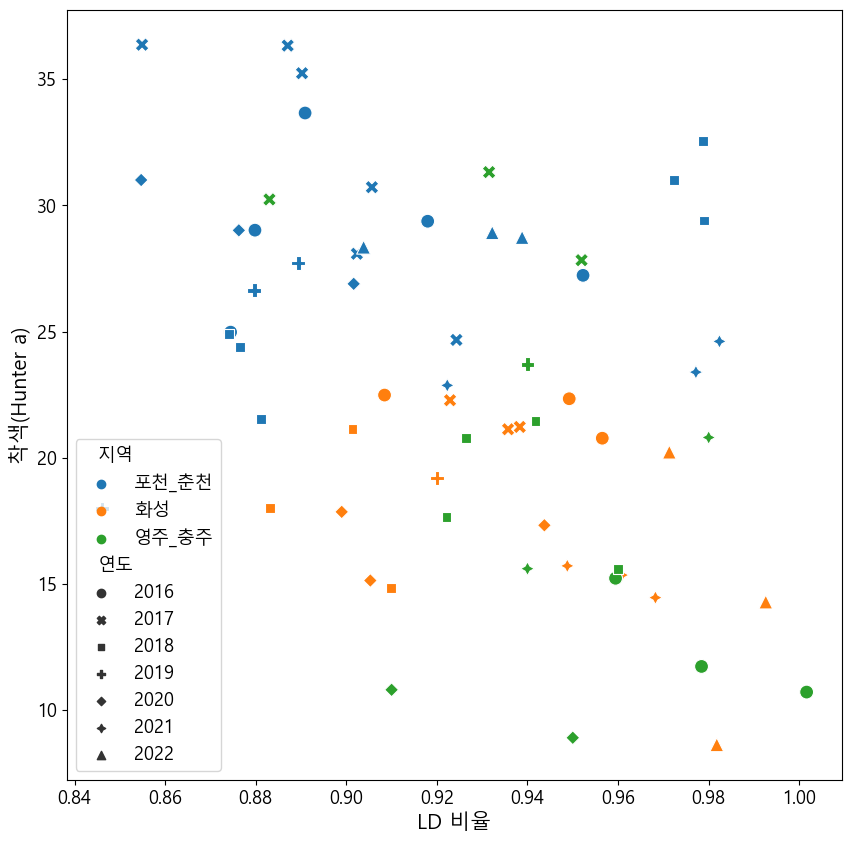

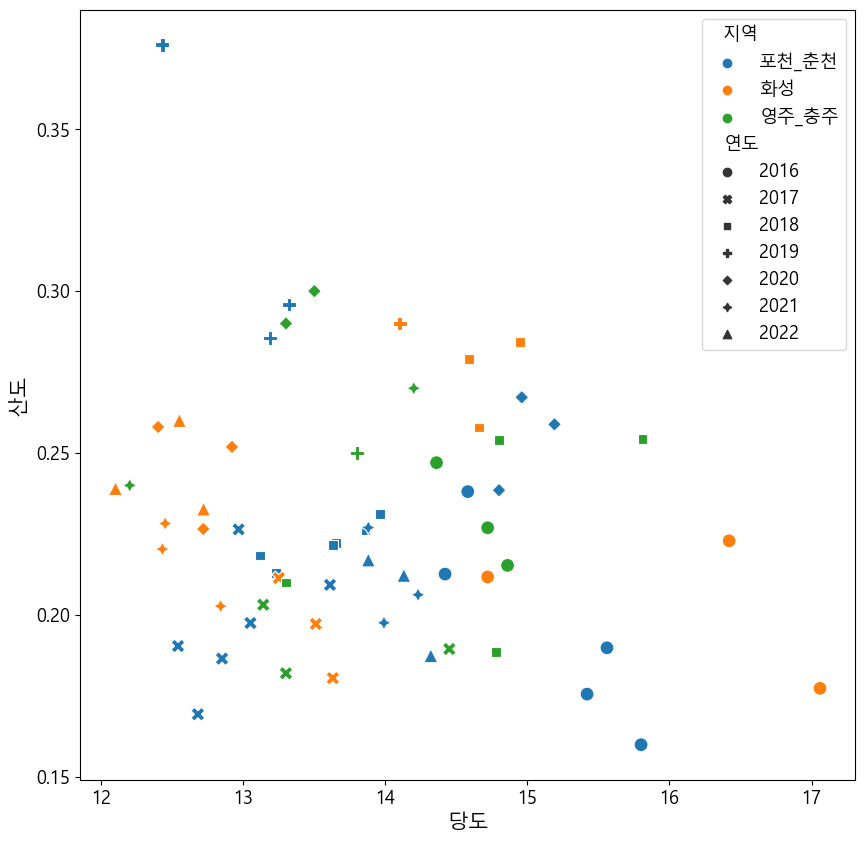

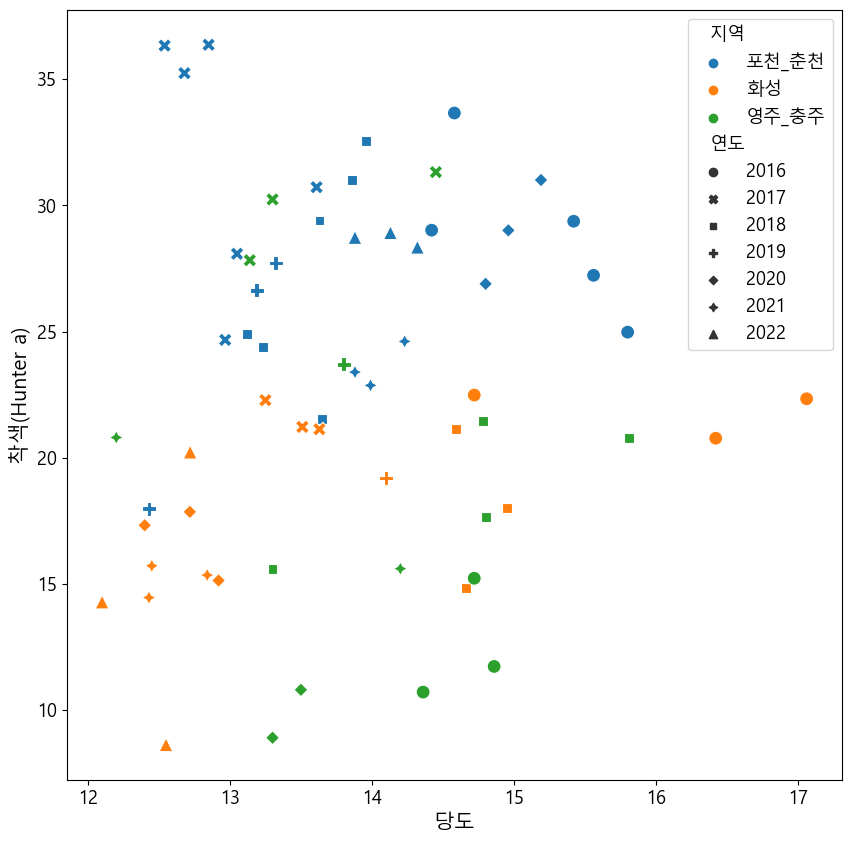

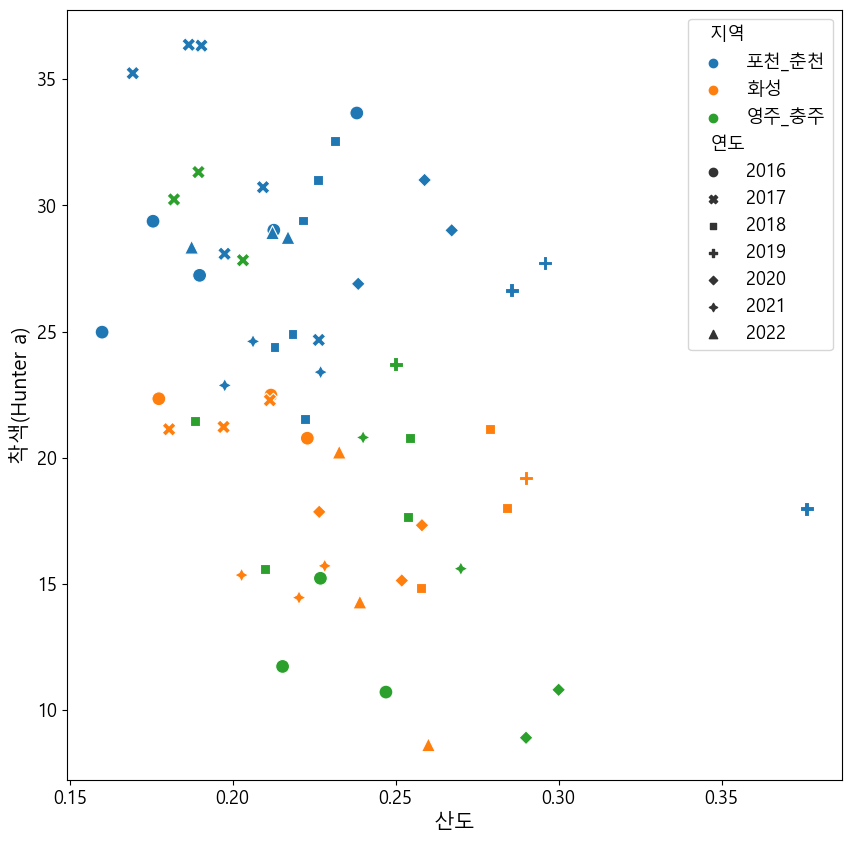

In [14]:
data_list = list(data.columns)

for col in data.columns:
    Kmean = KMeans(n_clusters = 3)
    data_list.remove(col)
    
    for col2 in data_list:
        pred = Kmean.fit_predict(data[[f'{col}', f'{col2}']])
        
#         center = Kmean.cluster_centers_

        plt.figure(figsize = (10, 10))
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    hue = '지역', style = '연도', s = 100, palette = "tab10")
#         plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)

        plt.xlabel(f'{col}', fontsize = 15)
        plt.ylabel(f'{col2}', fontsize = 15)

        plt.savefig(f'./3개 결과/{col}_{col2}_2')
        
plt.show()

In [ ]:
data_list = list(data.columns)

for col in data.columns:
    data_list.remove(col)
    
    for col2 in data_list:
        plt.figure(figsize = (10, 10))
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    hue = '지역', style = '연도', s = 100, palette = "tab10")
        
        plt.xlabel(f'{col}', fontsize = 15)
        plt.ylabel(f'{col2}', fontsize = 15)

#         plt.savefig(f'./3개 결과/{col}_{col2}_2')
        
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

col = '당도'
col2 = '착색(Hunter a)'

fig, ax = plt.subplots()

rect
for (x, y, w, h) in rect:
    ax.add_patch(
        patches.Recto\nagle(
            (x, y), w, h,
        ))